In [2]:
import os
import sys
from  dotenv import load_dotenv
import psycopg2
import pandas as pd 
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
load_dotenv()
user = os.environ['user']
password = os.environ['password']
host = os.environ['host']
port = os.environ['port']
database = os.environ['database']

In [4]:
def connect():
    conn = None
    try:
        print('Connecting...')
        conn = psycopg2.connect(
            host = host,
            database = database,
            user = user,
            password = password
        )
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)

    print("All good, Connection successfull!")
    return conn

In [5]:
def sql_dataFrame(conn, query):
    cursor = conn.cursor()
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    tuples_list = cursor.fetchall()

    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()
    return df

In [6]:
query = """ SELECT * FROM public.xdr_data"""

conn = connect()

df = sql_dataFrame(conn, query)

conn.close()

Connecting...
All good, Connection successfull!


In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
session_frequency = df.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')
len(session_frequency)

150001

In [9]:
Session_Duration = df['Dur. (ms)']
len(Session_Duration)

150001

In [10]:
total_traffic = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
len(total_traffic)

150001

In [11]:
df['Session Frequency'] = session_frequency
df['Session Duration'] = Session_Duration
df['Total Traffic'] = total_traffic
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Frequency,Session Duration,Total Traffic
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,2.0,1823652.0,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,2.0,1365104.0,707185356.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,1.0,1361762.0,307690973.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,1.0,1321509.0,889352748.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,1.0,1089009.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,1.0,81230.0,631804110.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,2.0,97970.0,705783925.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,1.0,98249.0,627698629.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,1.0,97910.0,401522016.0


In [12]:
aggregated_df = df.groupby('MSISDN/Number').agg({
    'Session Frequency': 'sum',
    'Session Duration': 'sum',
    'Total Traffic': 'sum',})
aggregated_df

,Session Frequency,Session Duration,Total Traffic
MSISDN/Number,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,4.0,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08
3.379000e+10,1.0,140988.0,4.803073e+08
3.197021e+12,1.0,877385.0,2.321240e+08


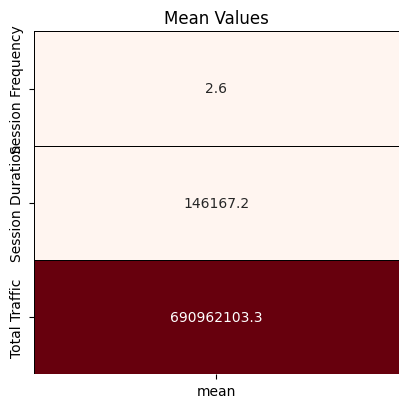

In [14]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#7789B2','#7789B2']

plt.subplot(1,1,1)

sns.heatmap(aggregated_df.describe().T[['mean']],
            cmap = 'Reds',
            
            annot = True,
            
            fmt = '.1f',
            
            linecolor = 'black',
            
            linewidths = 0.4,
            
            cbar = False)
plt.title('Mean Values')

fig.tight_layout(pad = 4)

In [15]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() 
ss = StandardScaler()
from sklearn.cluster import KMeans
kmeans=KMeans()

In [16]:
aggregated_df['Session Frequency']=mms.fit_transform(aggregated_df[['Session Frequency']])
aggregated_df['Session Duration']=mms.fit_transform(aggregated_df[['Session Duration']])
aggregated_df['Total Traffic']=mms.fit_transform(aggregated_df[['Total Traffic']])

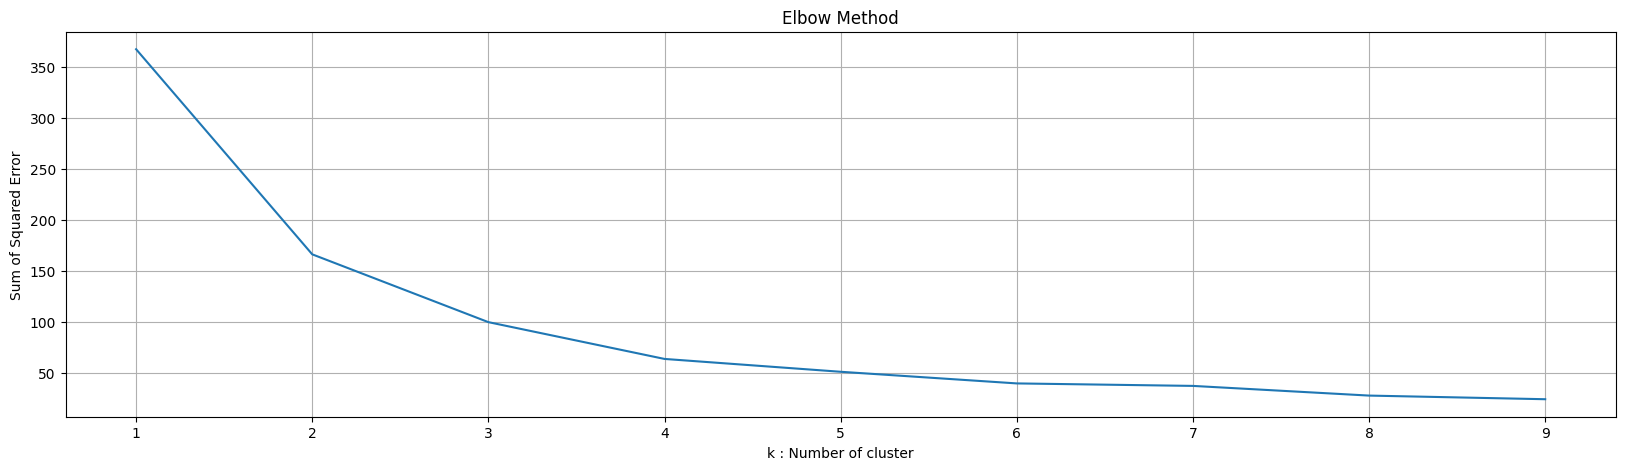

In [18]:
sse = {}
kmax = 10
fig = plt.subplots(figsize = (20,5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(aggregated_df)
    
    sse[k] = kmeans.inertia_ 
    
sns.lineplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [19]:
user_df = aggregated_df[['Session Frequency', 'Session Duration', 'Total Traffic']].values
model = KMeans(n_clusters = 2,max_iter = 1000)
model.fit(user_df)

KMeans(max_iter=1000, n_clusters=2)

In [20]:
cluster = model.cluster_centers_
cluster

array([[0.0014832 , 0.00591229, 0.0569118 ],
       [0.02468394, 0.01657296, 0.17618252]])

In [21]:
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
centroids = np.array(cluster)
centroids

array([[0.0014832 , 0.00591229, 0.0569118 ],
       [0.02468394, 0.01657296, 0.17618252]])

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(user_df, centroids)

less_engaged_cluster_index = 0
engagement_scores = distances[:, less_engaged_cluster_index]
mms = MinMaxScaler()
engagement_scores = mms.fit_transform(engagement_scores.reshape(-1, 1))
aggregated_df['Engagement Score'] = engagement_scores
aggregated_df

,Session Frequency,Session Duration,Total Traffic,Engagement Score
MSISDN/Number,,,,
3.360100e+10,0.000000,0.005908,0.095931,0.023330
3.360100e+10,0.000000,0.009387,0.014026,0.025817
3.360100e+10,0.000000,0.006892,0.063851,0.003528
3.360101e+10,0.000000,0.002304,0.044148,0.007368
3.360101e+10,0.009288,0.001615,0.161598,0.064330
...,...,...,...,...
3.379000e+10,0.000000,0.000090,0.077317,0.012290
3.379000e+10,0.000000,0.007217,0.050727,0.003111
3.197021e+12,0.000000,0.046922,0.022566,0.032313


In [24]:
avg_tcp_retransmission = df.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 
                                                      'TCP UL Retrans. Vol (Bytes)']].mean().mean(axis=1)

avg_tcp_retransmission.fillna(avg_tcp_retransmission.mean(), inplace=True)


avg_rtt = df.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().mean(axis=1)
avg_rtt.fillna(avg_rtt.mean(), inplace=True)

In [25]:
avg_throughput = df.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().mean(axis=1)
avg_throughput.fillna(avg_throughput.mean(), inplace=True)
handset_mode = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().values[0] if len(x.mode()) > 0 else None)

In [26]:
aggregated_df1 = pd.DataFrame({
    'Avg_TCP_Retransmission': avg_tcp_retransmission,
    'Avg_RTT': avg_rtt,
    'Handset_Type': handset_mode,
    'Avg_Throughput': avg_throughput
})


aggregated_df1.reset_index(inplace=True)
aggregated_df1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput
0,3.360100e+10,8.463363e+06,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0
1,3.360100e+10,8.463363e+06,15.500000,Apple iPhone 7 (A1778),49.5
2,3.360100e+10,8.463363e+06,68.269961,undefined,48.5
3,3.360101e+10,1.066000e+03,42.000000,Apple iPhone 5S (A1457),124.0
4,3.360101e+10,4.685416e+06,29.750000,Apple iPhone Se (A1723),14211.0
...,...,...,...,...,...
106851,3.379000e+10,1.090225e+05,26.000000,Huawei Honor 9 Lite,5182.5
106852,3.379000e+10,8.463363e+06,20.000000,Apple iPhone 8 Plus (A1897),58.0
106853,3.197021e+12,8.463363e+06,68.269961,Quectel Wireless. Quectel Ec25-E,0.5
106854,3.370000e+14,8.463363e+06,68.269961,Huawei B525S-23A,16.5


In [27]:
aggregated_df1['Avg_TCP_Retransmission']=mms.fit_transform(aggregated_df1[['Avg_TCP_Retransmission']])
aggregated_df1['Avg_RTT']=mms.fit_transform(aggregated_df1[['Avg_RTT']])
aggregated_df1['Avg_Throughput']=mms.fit_transform(aggregated_df1[['Avg_Throughput']])

In [28]:
user_df = aggregated_df1[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].values

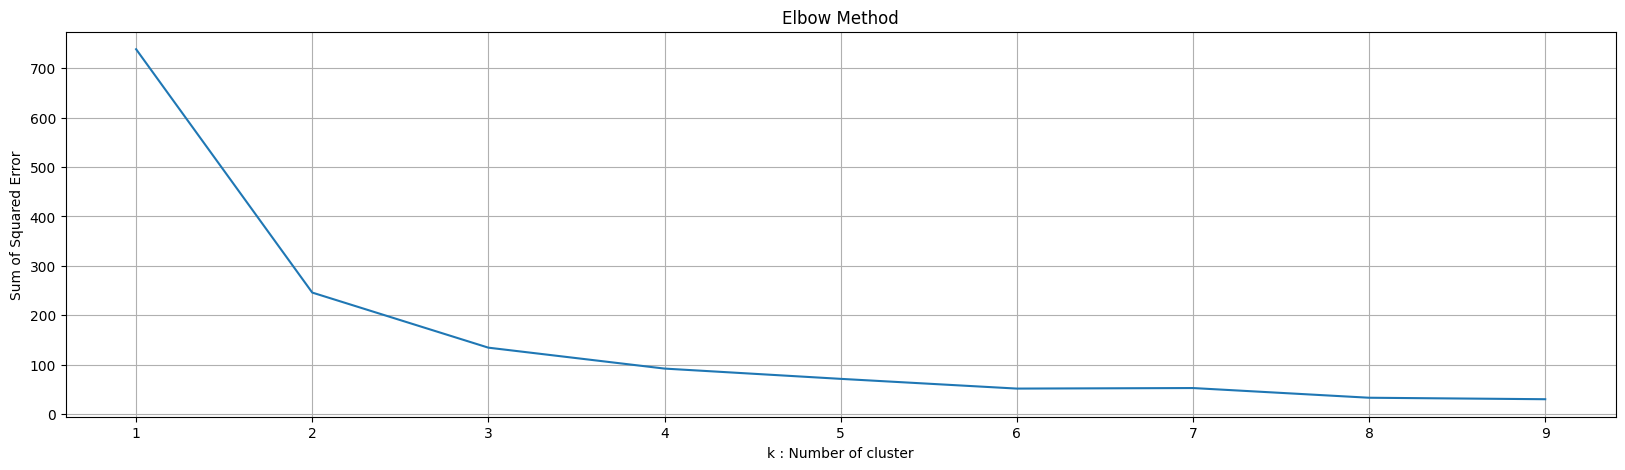

In [29]:
sse = {}
kmax = 10
fig = plt.subplots(figsize = (20,5))

# Elbow Method :
for k in range(1, 10):
    
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_df)
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
sns.lineplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()
plt.show()

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2,max_iter = 1000)
model.fit(user_df)

KMeans(max_iter=1000, n_clusters=2)

In [31]:
cluster = model.cluster_centers_
cluster
labels = model.labels_
labels
centroids= np.array(cluster)
centroids

array([[0.0019988 , 0.00148164, 0.01522291],
       [0.00618821, 0.00106132, 0.19451508]])

In [32]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
cluster_centroids = centroids
distances = euclidean_distances(user_df, cluster_centroids)
worst_experience_cluster_index = cluster_centroids.shape[0] - 1
experience_scores = distances[:, worst_experience_cluster_index]

mms = MinMaxScaler()
experience_scores = mms.fit_transform(experience_scores.reshape(-1, 1))
aggregated_df1['Experience Score'] = experience_scores
aggregated_df1

,MSISDN/Number,Avg_TCP_Retransmission,Avg_RTT,Handset_Type,Avg_Throughput,Experience Score
0,3.360100e+10,2.725529e-03,0.000475,Huawei P20 Lite Huawei Nova 3E,0.000268,0.190256
1,3.360100e+10,2.725529e-03,0.000320,Apple iPhone 7 (A1778),0.000349,0.190177
2,3.360100e+10,2.725529e-03,0.001409,undefined,0.000342,0.190183
3,3.360101e+10,3.426491e-07,0.000867,Apple iPhone 5S (A1457),0.000873,0.189726
4,3.360101e+10,1.508884e-03,0.000614,Apple iPhone Se (A1723),0.100102,0.092164
...,...,...,...,...,...,...
106851,3.379000e+10,3.510881e-05,0.000537,Huawei Honor 9 Lite,0.036505,0.154708
106852,3.379000e+10,2.725529e-03,0.000413,Apple iPhone 8 Plus (A1897),0.000409,0.190118
106853,3.197021e+12,2.725529e-03,0.001409,Quectel Wireless. Quectel Ec25-E,0.000004,0.190515
106854,3.370000e+14,2.725529e-03,0.001409,Huawei B525S-23A,0.000116,0.190404


In [34]:
aggregated_df


,Session Frequency,Session Duration,Total Traffic,Engagement Score
MSISDN/Number,,,,
3.360100e+10,0.000000,0.005908,0.095931,0.023330
3.360100e+10,0.000000,0.009387,0.014026,0.025817
3.360100e+10,0.000000,0.006892,0.063851,0.003528
3.360101e+10,0.000000,0.002304,0.044148,0.007368
3.360101e+10,0.009288,0.001615,0.161598,0.064330
...,...,...,...,...
3.379000e+10,0.000000,0.000090,0.077317,0.012290
3.379000e+10,0.000000,0.007217,0.050727,0.003111
3.197021e+12,0.000000,0.046922,0.022566,0.032313


In [35]:
df = pd.DataFrame({
    'MSISDN/Number': aggregated_df.index,
    'Engagement Score': aggregated_df['Engagement Score']
})

df = df.reset_index(drop=True)

df['Experience Score'] = experience_scores
df

,MSISDN/Number,Engagement Score,Experience Score
0,3.360100e+10,0.023330,0.190256
1,3.360100e+10,0.025817,0.190177
2,3.360100e+10,0.003528,0.190183
3,3.360101e+10,0.007368,0.189726
4,3.360101e+10,0.064330,0.092164
...,...,...,...
106851,3.379000e+10,0.012290,0.154708
106852,3.379000e+10,0.003111,0.190118
106853,3.197021e+12,0.032313,0.190515
106854,3.370000e+14,0.005437,0.190404


In [54]:
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2
df['Satisfaction Score']

0         0.106793
1         0.107997
2         0.096855
3         0.098547
4         0.078247
            ...   
106851    0.083499
106852    0.096614
106853    0.111414
106854    0.097921
106855    0.113598
Name: Satisfaction Score, Length: 106856, dtype: float64

In [38]:
df

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score
0,3.360100e+10,0.023330,0.190256,0.106793
1,3.360100e+10,0.025817,0.190177,0.107997
2,3.360100e+10,0.003528,0.190183,0.096855
3,3.360101e+10,0.007368,0.189726,0.098547
4,3.360101e+10,0.064330,0.092164,0.078247
...,...,...,...,...
106851,3.379000e+10,0.012290,0.154708,0.083499
106852,3.379000e+10,0.003111,0.190118,0.096614
106853,3.197021e+12,0.032313,0.190515,0.111414
106854,3.370000e+14,0.005437,0.190404,0.097921


In [39]:
top_10_satisfied_customers = df.sort_values(by='Satisfaction Score', ascending=False).head(10)
print(top_10_satisfied_customers)

       MSISDN/Number  Engagement Score  Experience Score  Satisfaction Score
13180   3.362578e+10          1.000000          0.148127            0.574063
13526   3.362632e+10          0.861393          0.167251            0.514322
47983   3.366232e+10          0.019735          1.000000            0.509867
33226   3.365889e+10          0.001510          0.976575            0.489042
6437    3.361489e+10          0.869418          0.103802            0.486610
92923   3.376054e+10          0.770504          0.147771            0.459138
61964   3.366610e+10          0.001506          0.858327            0.429917
37052   3.365973e+10          0.714690          0.128734            0.421712
76363   3.367588e+10          0.690995          0.143581            0.417288
37838   3.365991e+10          0.007575          0.791318            0.399447


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
X = df[['Engagement Score', 'Experience Score']]
y = df['Satisfaction Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [43]:
y_pred = model.predict(X_test)
y_pred

array([0.09778145, 0.09749895, 0.10428478, ..., 0.14430885, 0.0876457 ,
       0.06089057])

In [44]:
y_test

64473    0.097781
83243    0.097499
39296    0.104285
44869    0.074452
99282    0.097636
           ...   
67669    0.058640
63720    0.095586
16701    0.144309
44897    0.087646
97963    0.060891
Name: Satisfaction Score, Length: 21372, dtype: float64

In [45]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 8.342312198782628e-34


In [46]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.2333144312398958e-17


In [47]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0


In [48]:
from sklearn.cluster import KMeans

df = df[['Engagement Score', 'Experience Score']]
X = df.values

In [49]:
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=2, random_state=42)

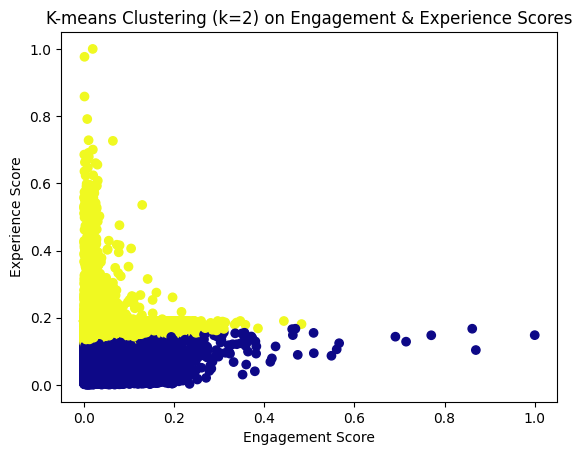

In [50]:
cluster_labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='plasma')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-means Clustering (k=2) on Engagement & Experience Scores')
plt.show()